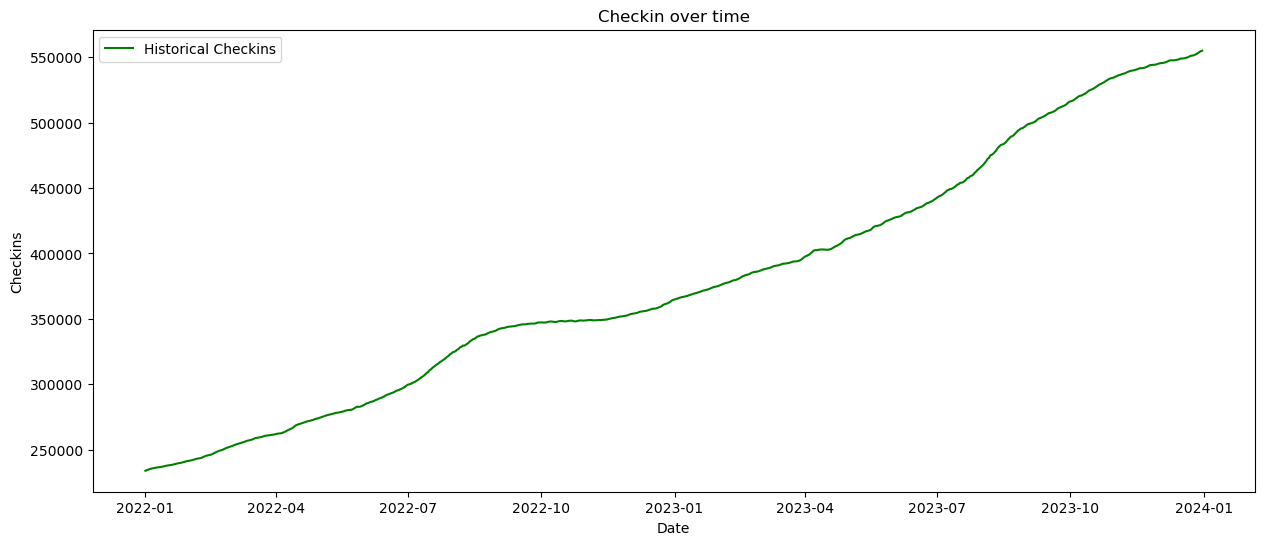

DataFrame with Prediction Column:
            Checkins  Prediction
Date                            
2022-01-01    234009    365223.0
2022-01-02    234448    365477.0
2022-01-03    234907    365891.0
2022-01-04    235291    366320.0
2022-01-05    235576    366597.0
...              ...         ...
2023-12-27    552279         NaN
2023-12-28    553030         NaN
2023-12-29    553850         NaN
2023-12-30    554505         NaN
2023-12-31    554841         NaN

[730 rows x 2 columns]

Scaled Feature Matrix X:
[[-1.55919249e+00]
 [-1.55446616e+00]
 [-1.54952449e+00]
 [-1.54539029e+00]
 [-1.54232194e+00]
 [-1.53942585e+00]
 [-1.53757407e+00]
 [-1.53444112e+00]
 [-1.53282620e+00]
 [-1.53123281e+00]
 [-1.52974708e+00]
 [-1.52757232e+00]
 [-1.52478389e+00]
 [-1.52178013e+00]
 [-1.51918549e+00]
 [-1.51678464e+00]
 [-1.51549270e+00]
 [-1.51345790e+00]
 [-1.51142310e+00]
 [-1.50880693e+00]
 [-1.50577087e+00]
 [-1.50230417e+00]
 [-1.49944038e+00]
 [-1.49671654e+00]
 [-1.49542461e+00]
 [-1.4927438

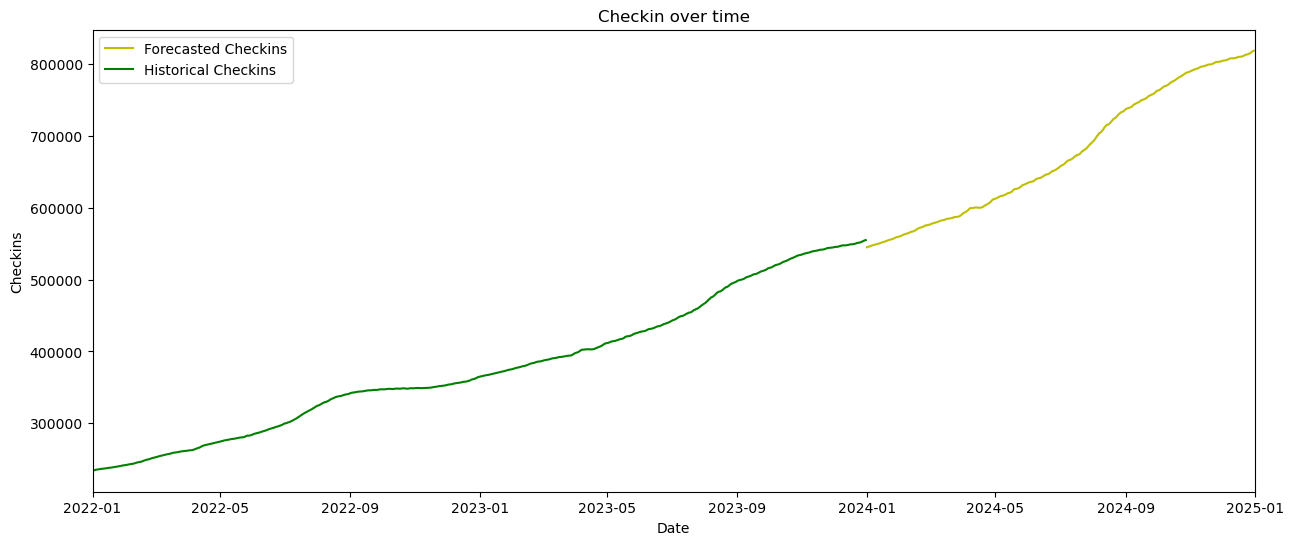

246928349.4437206


In [9]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

# Retrieve Checkins Hotelbeds data
df = pd.read_csv('/Users/joaquinalmiron/Desktop/total_checkin.csv')

# Convert 'Date' column to datetime and then to date
df['Date'] = pd.to_datetime(df['Date']).dt.date

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Plot the historical 'Checkins' data
plt.figure(figsize=(15, 6))
df['Checkins'].plot(color='g', label='Historical Checkins')
plt.title('Checkin over time')
plt.xlabel('Date')
plt.ylabel('Checkins')
plt.legend(loc='upper left')
plt.show()

# Create a 'Prediction' column by shifting 'Checkins' values
forecast = 366
df['Prediction'] = df['Checkins'].shift(-forecast)

# Display the DataFrame with the 'Prediction' column
print("DataFrame with Prediction Column:")
print(df)

# Prepare the feature matrix X by scaling the features
X = np.array(df.drop(['Prediction'], axis=1))
X = preprocessing.scale(X)

# Display the scaled feature matrix X
print("\nScaled Feature Matrix X:")
print(X)

# Separate features and labels for training and testing
X_forecast = X[-forecast:]
X = X[:-forecast]
y = np.array(df['Prediction'])
y = y[:-forecast]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize Linear Regression model
clf = LinearRegression()

# Fit the model on training data
clf.fit(X_train, y_train)

# Evaluate model confidence on the test set
confidence = clf.score(X_test, y_test)
print("\nModel Confidence on Test Set:", confidence)

# Predict checkins for the forecast period
forecast_predicted = clf.predict(X_forecast)
print("\nPredicted checkins for the Forecast Period:")
print(forecast_predicted)

# Generate dates for the forecast period
dates = pd.date_range(start='2024-01-01', end='2024-12-31')
print("\nDates for the Forecast Period:")
print(dates)

# Plot the predicted checkins along with historical prices
plt.figure(figsize=(15, 6))
plt.plot(dates, forecast_predicted, color='y', label='Forecasted Checkins')
df['Checkins'].plot(color='g', label='Historical Checkins')
plt.title('Checkin over time')
plt.xlabel('Date')
plt.ylabel('Checkins')
plt.legend(loc='upper left')
plt.xlim(xmin=datetime.date(2022, 1, 1),xmax=datetime.date(2025,1,1))
plt.show()
print(sum(forecast_predicted))